# LAB-02

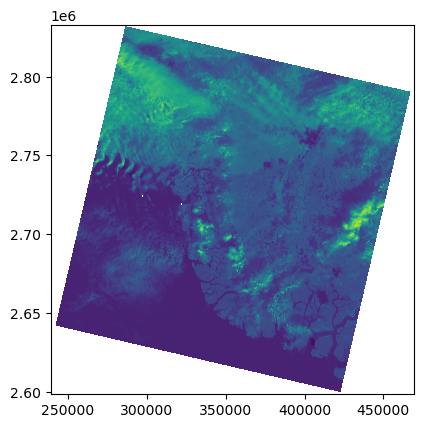

<Axes: >

In [2]:
import rasterio
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
from PIL import Image
img = rasterio.open("C:\\Users\\hp\\DIP\\GISTools\\SECOND MANUAL\\USGSDATA L3\\LC09_L2SP_152043_20211231_20220121_02_T1_SR_B5.tif")
show(img)
# pixels = img.load()LC09_L2SP_152043_20211231_20220121_02_T1_SR_B5

# Reading Multiple Bands

# GRAY-COLORED IMAGE:

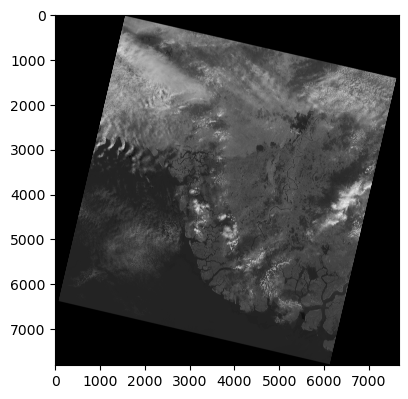

In [3]:
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:
ax1.imshow(img_band1, cmap='gray')

plt.show()

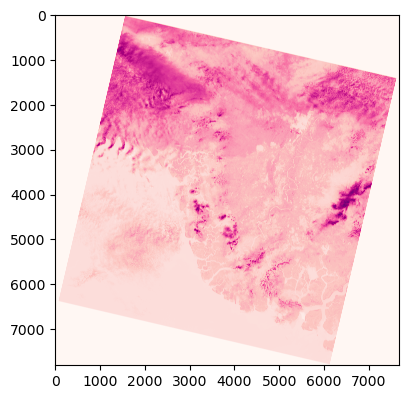

In [17]:
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:

b=ax1.imshow(img_band1, cmap='RdPu')
plt.show(b)

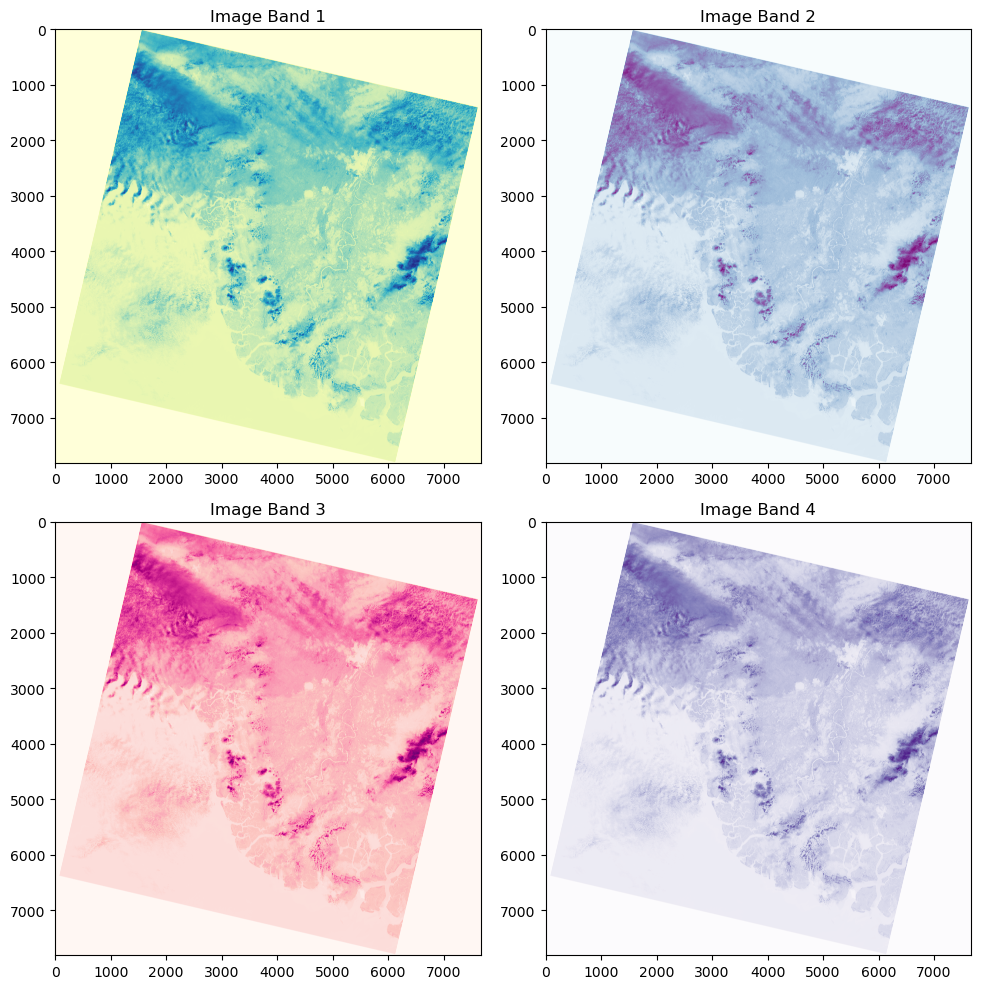

In [29]:
import matplotlib.pyplot as plt
img_band1 = img.read(1)
img_band2 = img.read(1)
img_band3 = img.read(1)
img_band4 = img.read(1)

fig = plt.figure(figsize=(10, 10))

# First subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img_band1, cmap='YlGnBu')
ax1.set_title('Image Band 1')

# Second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(img_band2, cmap='BuPu')
ax2.set_title('Image Band 2')

# Third subplot (top-right)
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(img_band3, cmap='RdPu')
ax3.set_title('Image Band 3')

# Fourth subplot (top-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(img_band4, cmap='Purples')
ax4.set_title('Image Band 4')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

#plot_color_gradients('Sequential',
                    # ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                     # 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      #'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
#plot_color_gradients('Perceptually Uniform Sequential',
                    # ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])
#https://matplotlib.org/stable/tutorials/colors/colormaps.html ~ for more color details  


# Meta Data About Tiff Images

In [30]:

import rasterio

# Open the GeoTIFF image
with rasterio.open("C:\\Users\\hp\\DIP\\GISTools\\SECOND MANUAL\\USGSDATA L3\\LC09_L2SP_152043_20211231_20220121_02_T1_SR_B5.tif") as dataset:
    # Check the size (dimensions)
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)

    # Check the number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 7671 x 7811
Number of Bands: 1


In [31]:
img.crs

CRS.from_epsg(32642)

In [32]:
metadata=img.meta
print("metadata", metadata)

metadata {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7671, 'height': 7811, 'count': 1, 'crs': CRS.from_epsg(32642), 'transform': Affine(30.0, 0.0, 239085.0,
       0.0, -30.0, 2832915.0)}


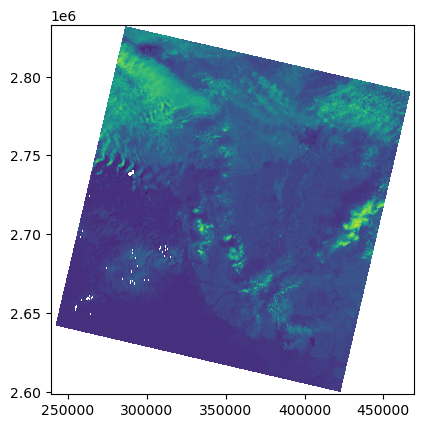

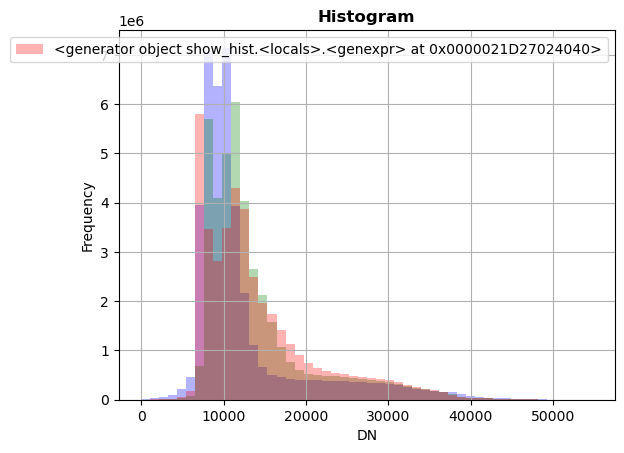

In [68]:
import rasterio
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
from PIL import Image
img = rasterio.open("C:\\Users\\hp\\DIP\\GISTools\\SECOND MANUAL\\USGSDATA L3\\NaturalComposite.tif")
show(img)
## Plot pixel value histogram in each band. 
rasterio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

# Clipping

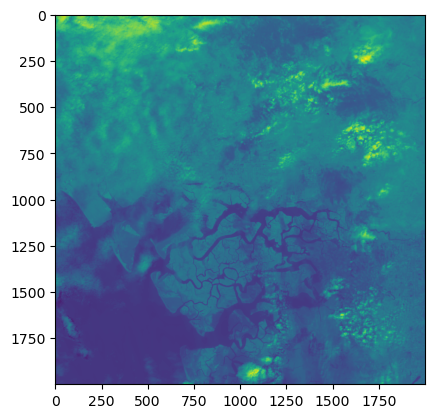

In [44]:
import rasterio
import matplotlib.pyplot as plt

# Open the raster image using rasterio
with rasterio.open('C:\\Users\\hp\\DIP\\GISTools\\SECOND MANUAL\\USGSDATA L3\\LC09_L2SP_152043_20211231_20220121_02_T1_SR_B5.tif', 'r') as src:
    # Read the data (bands) from the raster dataset
    img = src.read()

# Assuming you want to clip the data to a specific region within the raster
# For example, here we are clipping the region from rows 300 to 900 and columns 300 to 900
clipped_img = img[:, 2000:4000, 2000:4000]

# Visualize the clipped image (assuming it is a 3-band image)
plt.imshow(clipped_img.transpose(1, 2, 0))  # Transpose to (height, width, bands) for visualization
plt.show()
# clipped_img = img[:, 1000:1500, 1000:1500]
# plt.imshow(clipped_img[0,:,:])

# Calculating NDVI Or Desired Parameters

In [80]:

red_clipped = img[0].astype('f4')
nir_clipped = img[1].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
import numpy as np
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
plt.imshow(ndvi_clipped3, cmap='viridis')
plt.colorbar()

TypeError: 'DatasetReader' object is not subscriptable

C:\Users\hp\AppData\Local\Temp\ipykernel_14084\4283484919.py:15: RuntimeWarning: invalid value encountered in divide
  ndvi = (img_nir_normalized - img_red_normalized) / (img_nir_normalized + img_red_normalized)
C:\Users\hp\AppData\Local\Temp\ipykernel_14084\4283484919.py:16: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped2 = np.divide(np.subtract(img_nir_normalized,img_red_normalized ), np.add(img_nir_normalized, img_red_normalized))


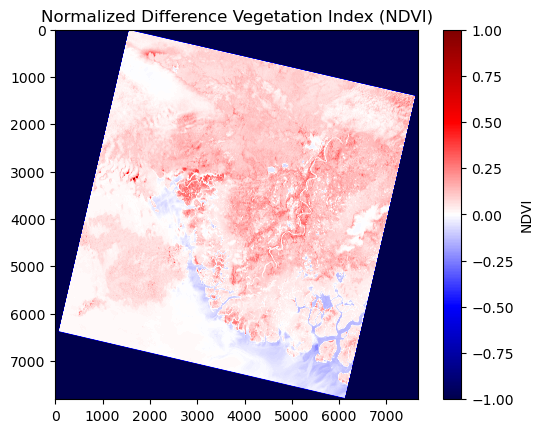

In [79]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Specify the file paths of the images
red_band_path = 'C:\\Users\\hp\\DIP\\GISTools\\SECOND MANUAL\\USGSDATA L3\\LC09_L2SP_152043_20211231_20220121_02_T1_SR_B4.tif'
nir_band_path = 'C:\\Users\\hp\\DIP\\GISTools\\SECOND MANUAL\\USGSDATA L3\\LC09_L2SP_152043_20211231_20220121_02_T1_SR_B5.tif'


# Normalize pixel values to the range [0, 1]
img_red_normalized = img_red_array.astype(float) / np.max(img_red_array)
img_nir_normalized = img_nir_array.astype(float) / np.max(img_nir_array)

# Calculate NDVI
ndvi = (img_nir_normalized - img_red_normalized) / (img_nir_normalized + img_red_normalized)
ndvi_clipped2 = np.divide(np.subtract(img_nir_normalized,img_red_normalized ), np.add(img_nir_normalized, img_red_normalized))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
# Display the NDVI result
plt.imshow(ndvi_clipped3, cmap='seismic')  # Use 'viridis' colormap for NDVI
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.show()
